<a href="https://colab.research.google.com/github/tdlinh2712/DeepLearning-with-Tensorflow/blob/master/STock_returns_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import tensorflow as tf

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/sbux.csv')
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
1,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
2,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
3,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
4,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


In [68]:
df.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,56.280,56.42,55.89,56.00,14690146,SBUX
1255,2018-02-02,55.900,56.32,55.70,55.77,15358909,SBUX
1256,2018-02-05,55.530,56.26,54.57,54.69,16059955,SBUX
1257,2018-02-06,53.685,56.06,53.56,55.61,17415065,SBUX
1258,2018-02-07,55.080,55.43,54.44,54.46,13927022,SBUX


In [69]:
series = df['close'].values.reshape(-1, 1)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
# normalize the data
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [72]:
# build the dataset

T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X = np.append(X, x)
  y = series[t+T]
  Y = np.append(Y, y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1249, 10, 1) Y.shape (1249,)


In [73]:
from tensorflow.keras.layers import  Dense, Input, LSTM
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam

In [74]:
# try autogregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer=Adam(lr=0.1),
)

# train the rnn
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 25ms/step - loss: 0.3116 - val_loss: 0.7263
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0266 - val_loss: 0.1344
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0076 - val_loss: 0.0549
Epoch 4/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0071 - val_loss: 0.0435
Epoch 5/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0085 - val_loss: 0.0494
Epoch 6/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0065 - val_loss: 0.0503
Epoch 7/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0059 - val_loss: 0.0379
Epoch 8/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0391
Epoch 9/80
20/20 [==============================] - 0s 8ms/step - loss: 0.0068 - val_loss: 0.0358
Epoch 10/80
20/20 [==============================] - 0s 7ms/step - loss: 0.0066 - val_loss: 0.0688
Epoch 11/80
20/20 [==========

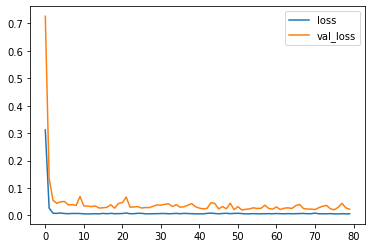

In [75]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1249, 1)


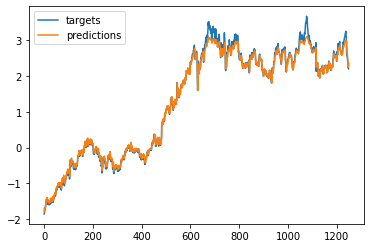

In [76]:
# one-step forecast usign true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

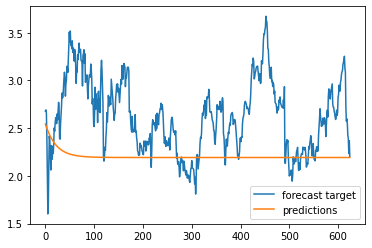

In [78]:
# multi-step forecast usign true targets
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='predictions')
plt.legend()
plt.show()

In [79]:
df['PrevClose'] = df['close'].shift(1)

In [80]:
df['Return'] = (df['close'] - df['PrevClose'])/df['PrevClose']

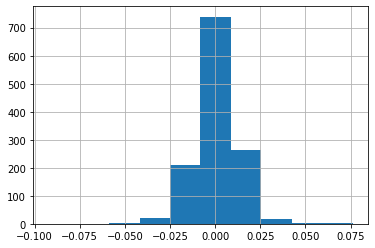

In [81]:
df['Return'].hist()

In [82]:
series = df['Return'].values[1:].reshape(-1, 1)
# normalize the data
scaler = StandardScaler()
scaler.fit(series[:len(series) // 2])
series = scaler.transform(series).flatten()

In [83]:
# build the dataset

T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X = np.append(X, x)
  y = series[t+T]
  Y = np.append(Y, y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (1248, 10, 1) Y.shape (1248,)


In [84]:
# try autogregressive RNN model
i = Input(shape=(T, 1))
x = LSTM(5)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer=Adam(lr=0.1),
)

# train the rnn
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


20/20 [==============================] - 2s 26ms/step - loss: 1.0224 - val_loss: 1.1399
Epoch 2/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9981 - val_loss: 1.1328
Epoch 3/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9884 - val_loss: 1.1598
Epoch 4/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9866 - val_loss: 1.1576
Epoch 5/80
20/20 [==============================] - 0s 7ms/step - loss: 0.9789 - val_loss: 1.2305
Epoch 6/80
20/20 [==============================] - 0s 8ms/step - loss: 0.9746 - val_loss: 1.1907
Epoch 7/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9731 - val_loss: 1.2661
Epoch 8/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9667 - val_loss: 1.2094
Epoch 9/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9602 - val_loss: 1.2167
Epoch 10/80
20/20 [==============================] - 0s 6ms/step - loss: 0.9758 - val_loss: 1.2042
Epoch 11/80
20/20 [==========

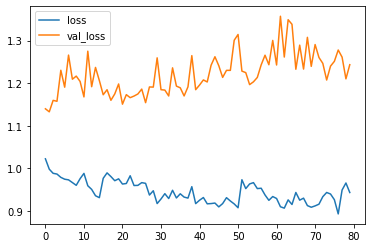

In [85]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

(1248, 1)


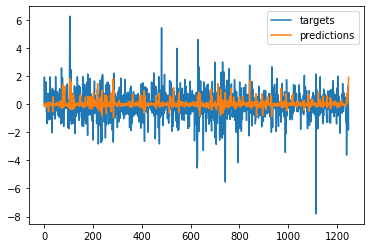

In [86]:
# one-step forecast usign true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]
plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

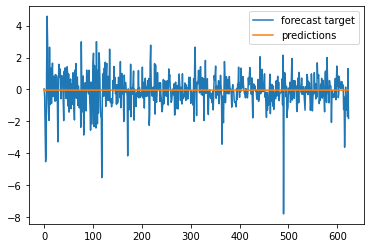

In [87]:
# multi-step forecast usign true targets
validation_target = Y[-N//2:]
validation_predictions = []

#last train input
last_x = X[-N//2]
while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, T, 1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='predictions')
plt.legend()
plt.show()

In [88]:
#now turn the data input numpy arrays

input_data = df[['open', 'high', 'low', 'close', 'volume']].values
targets = df['Return'].values

In [89]:
# make T x D x data
T = 10
D = input_data.shape[1]
N = len(input_data) - T

In [90]:
#normalize input
Ntrain = len(input_data) * 2 // 3
scaler = StandardScaler()
scaler.fit(input_data[:Ntrain + T])
input_data = scaler.transform(input_data)

In [91]:
# setup X_train and Y_train
X_train = np.zeros((Ntrain, T, D))
Y_train = np.zeros(Ntrain)

for t in range(Ntrain):
  X_train[t, :, :] = input_data[t:t+T]
  Y_train[t] = (targets[t+T] > 0)

In [92]:
# setup X_test and Y_test
X_test = np.zeros((N-Ntrain, T, D))
Y_test = np.zeros(N-Ntrain)

for u in range(N-Ntrain):
  t = u+Ntrain
  X_test[u, :, :] = input_data[t:t+T]
  Y_test[u] = (targets[t+T] > 0)

In [93]:
# make the RNN
i = Input(shape=(T, D))
x = LSTM(50)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(loss = 'binary_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [94]:
# train the rnn
r = model.fit(X_train, Y_train, batch_size=32,epochs=300, validation_data=(X_test, Y_test))

Epoch 1/300
27/27 [==============================] - 2s 23ms/step - loss: 0.6942 - accuracy: 0.5006 - val_loss: 0.6957 - val_accuracy: 0.4854
Epoch 2/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5292 - val_loss: 0.6916 - val_accuracy: 0.5439
Epoch 3/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5018 - val_loss: 0.6933 - val_accuracy: 0.4927
Epoch 4/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5316 - val_loss: 0.6912 - val_accuracy: 0.5439
Epoch 5/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6909 - accuracy: 0.5244 - val_loss: 0.6919 - val_accuracy: 0.5195
Epoch 6/300
27/27 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5089 - val_loss: 0.6924 - val_accuracy: 0.5098
Epoch 7/300
27/27 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5316 - val_loss: 0.6904 - val_accuracy: 0.5341
Epoch 8/300


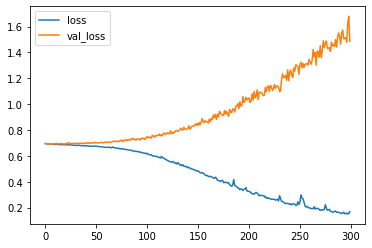

In [95]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

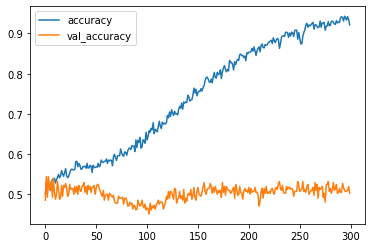

In [96]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()